# Explore here

In [2]:
import pandas as pd
#Paso 1: Recopilación de datos

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.to_csv("../data/raw/insurance_data.csv", index = False)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
def separar_columnas(df):
    categoricas = []
    numericas = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [21]:
df.drop(['sex','region','children'], axis = 1, inplace = True)
df.head()

,age,bmi,smoker,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,1,4449.46200
3,33,22.705,1,21984.47061
4,32,28.880,1,3866.85520


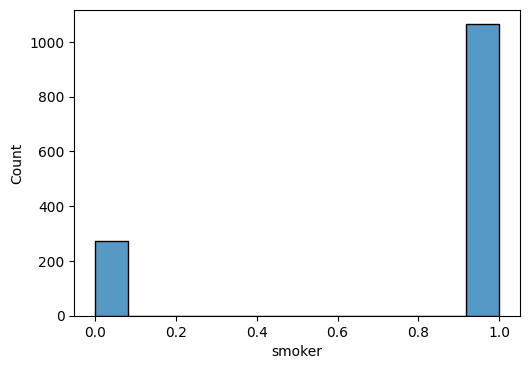

In [25]:
# Analisis de variables univariadas, analisis de variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create Histogram

sns.histplot(ax = axis[0,0], data = df, x = "smoker")


fig.delaxes(axis[0, 1])
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

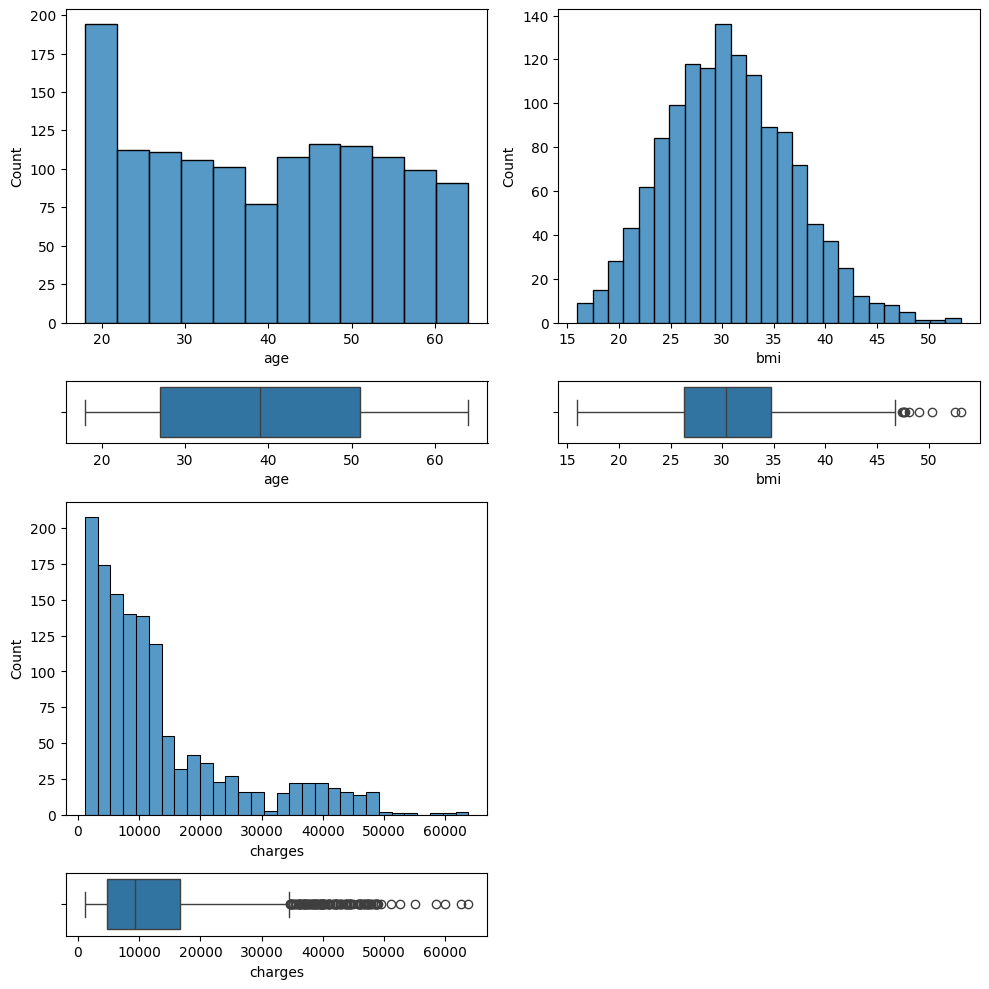

In [26]:
# Analisis de variables univariadas, analisis de variables numéricas
fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='charges')
sns.boxplot(ax=axis[3,0],data=df,x='charges')


fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

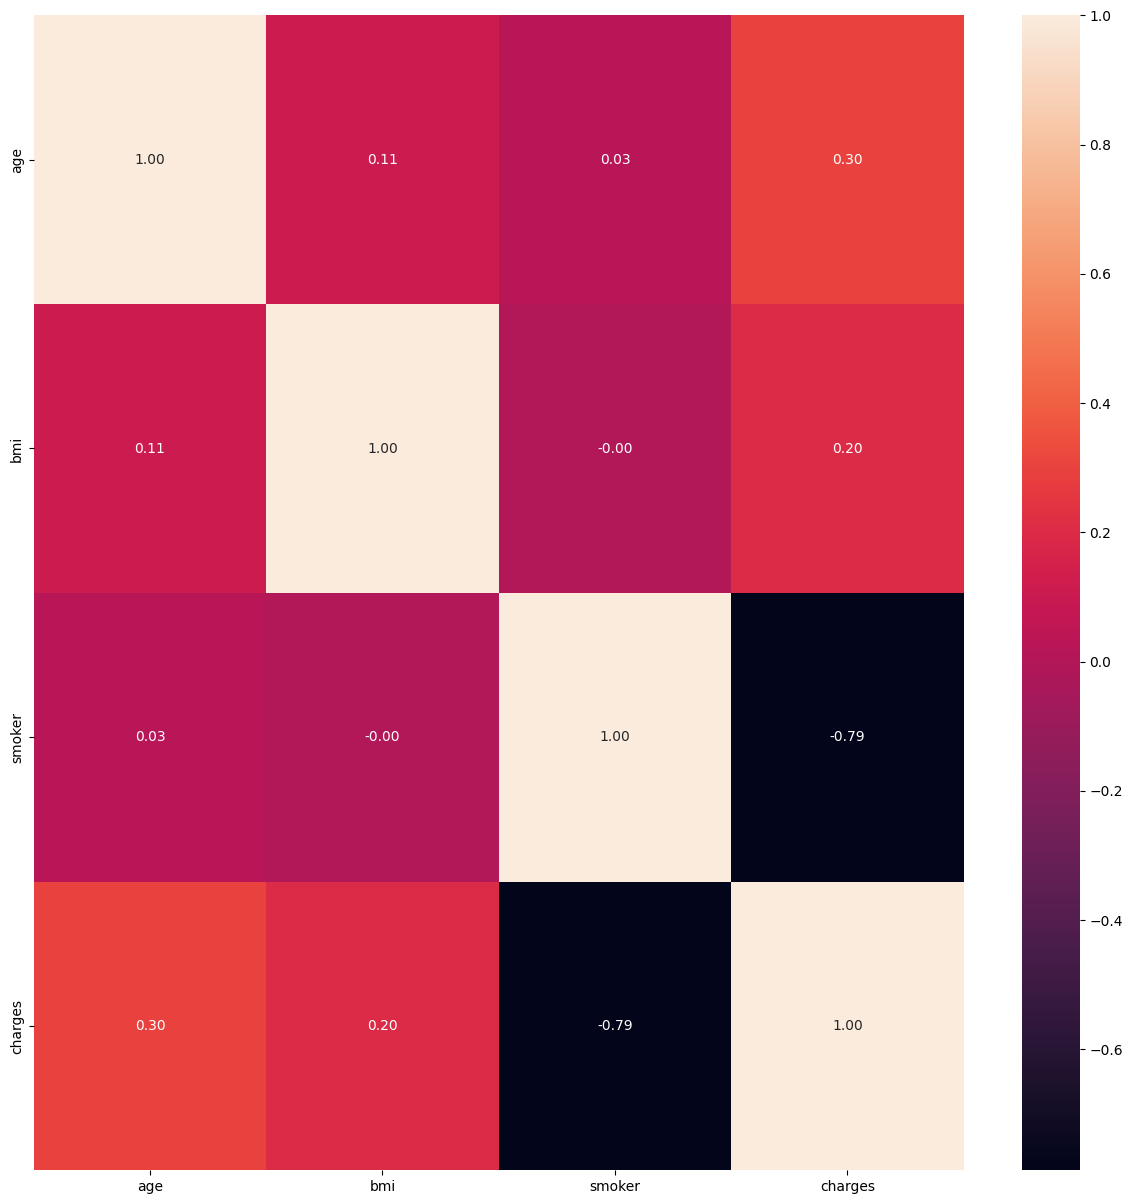

In [28]:
    #Análisis de todas las correlaciónes
    # Factorización de variables cátegoricas
df['smoker'] = pd.factorize(df['smoker'])[0]

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()